In [7]:
install.packages('tseries')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’




# Ler dados, grafico de dispersao

[1] "ano" "mes" "co2"

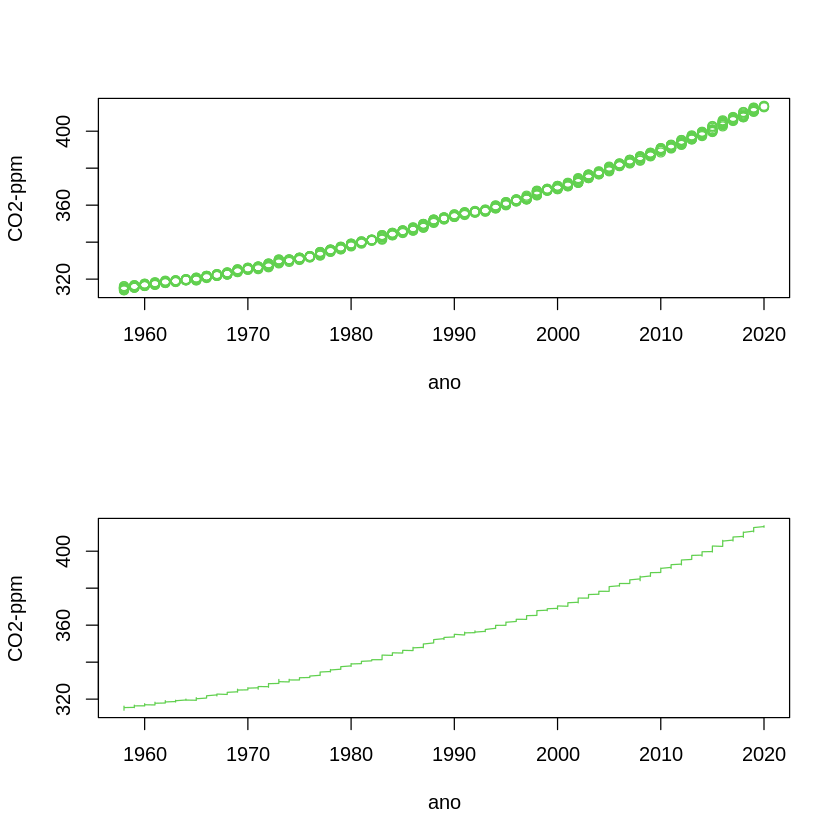

In [9]:
require (tseries)
dados=read.table("dados-co2.txt",header=T,sep="",dec=",")# entrada de dados. Pasta Dose NA
names(dados)
# dados
# attach(dados)
par(mfrow = c(2, 1))
plot(dados$ano, dados$co2, col="3",xlab="ano", ylab="CO2-ppm")#grafico de dispersão
plot(dados$ano, dados$co2, type="l", col="3",xlab="ano", ylab="CO2-ppm")#grafico de dispersão

# Decomposicao STL
- Sazonalidade: flutuações recorrentes e previsíveis em um dataset.
- Tendência: direção a longo prazo.
- Resíduos: correspondente a possíveis erros de medição ou eventos aleatórios.

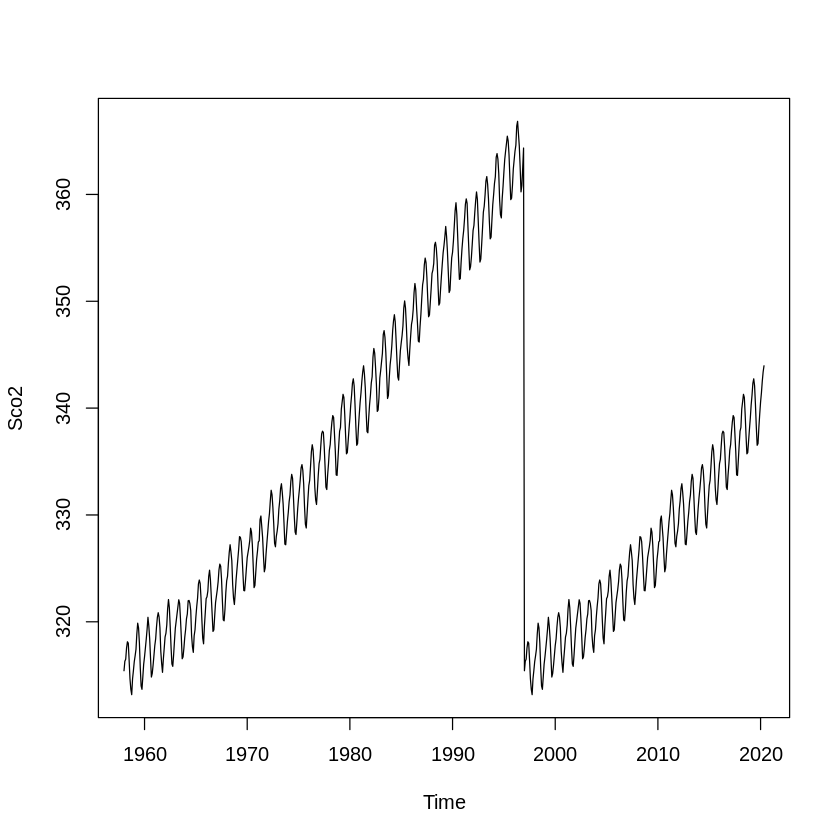

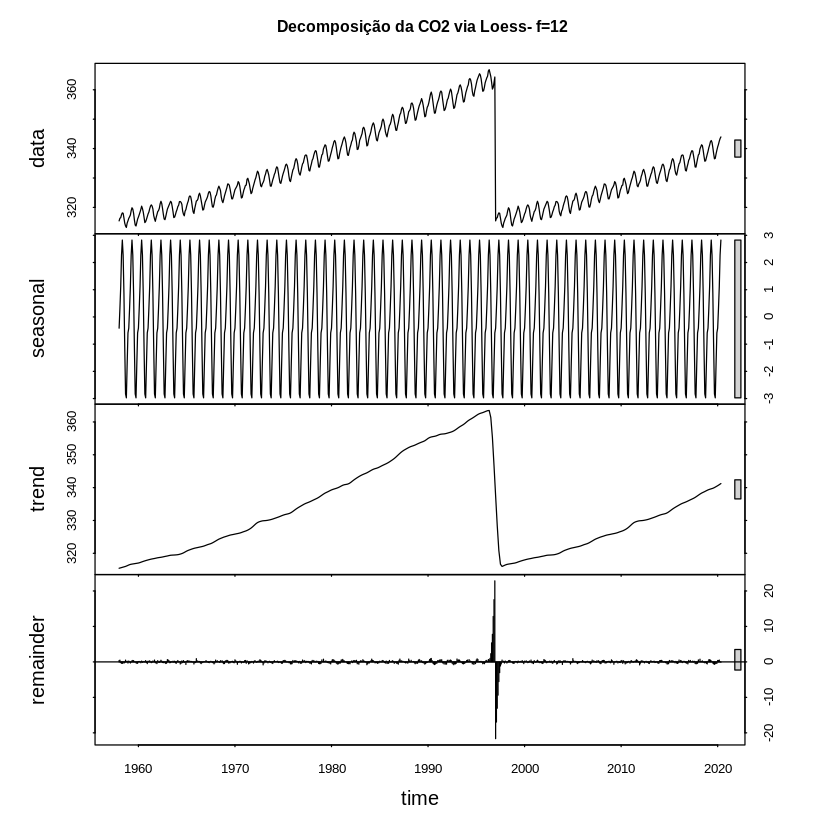

In [12]:
Sco2<-ts(co2,frequency=12, start = c(1958, 1), end = c(2020, 5))
# Sco2
plot(Sco2)
# log(Sco2)
plot(stl(Sco2, s.window="periodic"),main=" Decomposição da CO2 via Loess- f=12")

# FAC/ACF: Função de Autocorrelação

### Determinar valores de FAC
- Identificar a necessidade de retirar a sazonalidade
   - Por que retirar a sazonalidade? Método ARIMA supõe dados estacionários,
   porque assim a média, variância e covariância são constantes.

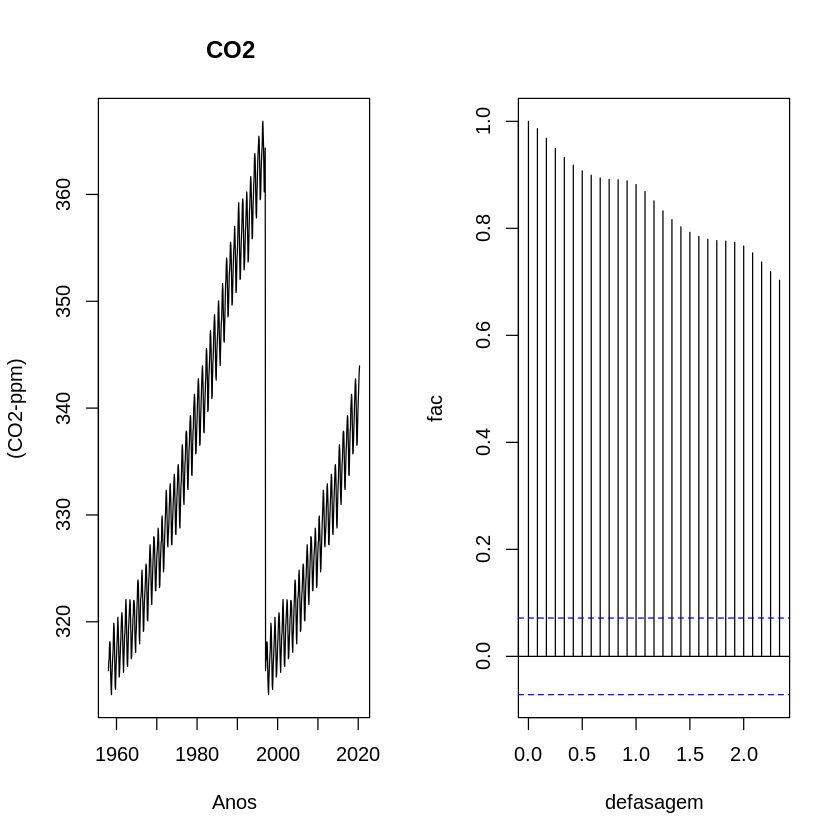

In [13]:
par(mfrow=c(1,2))
plot(Sco2,main='CO2 ',xlab='Anos',ylab='(CO2-ppm)')
acf (Sco2,xlab='defasagem',ylab='fac',main='',na.action=na.pass)

### Diferenciação
- Remover sazonalidade (induzir estacionaridade) na série
- Lag: deslocamento de valores a fim de aproximar valores passados de futuros,
com o objetivo de facilitar a previsão.

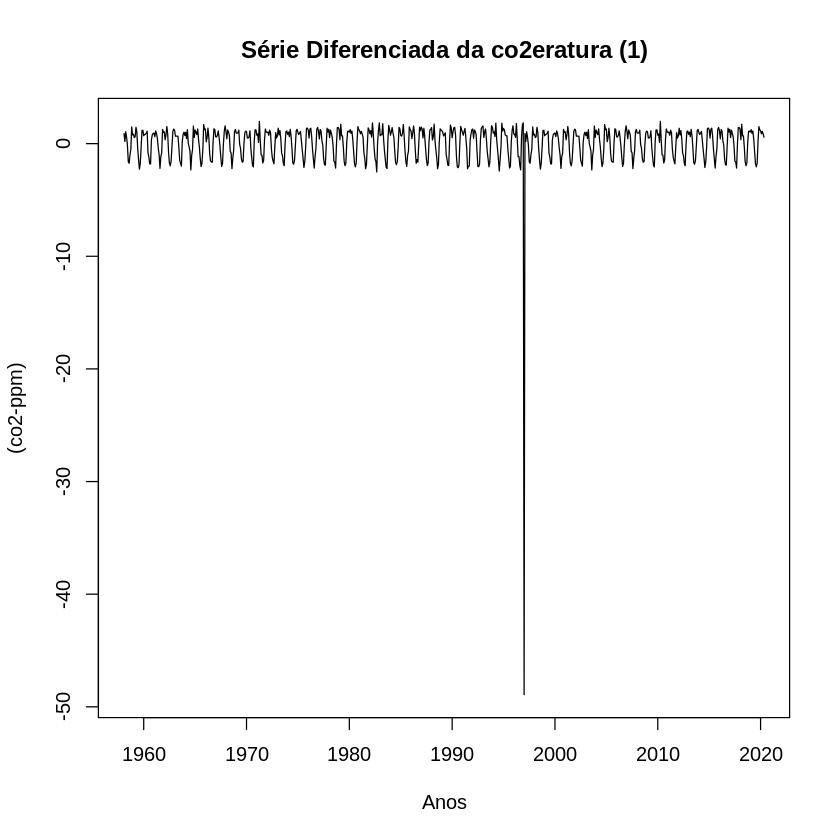

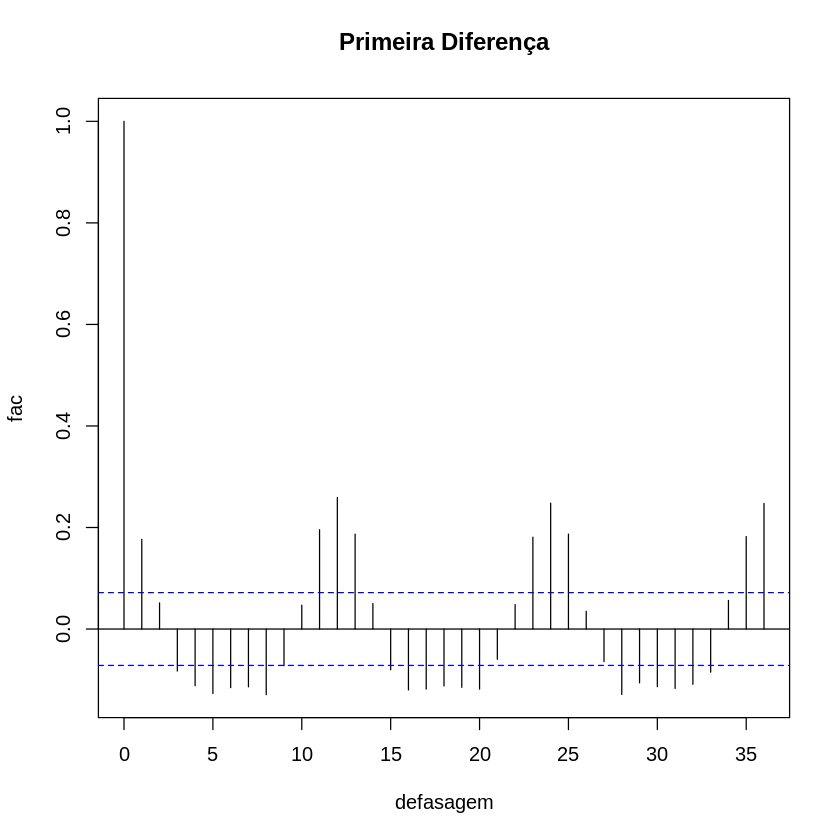

In [14]:
plot(diff(Sco2),main='Série Diferenciada da co2eratura (1)',xlab='Anos',ylab=' (co2-ppm) ')
min.m = acf(diff(Sco2),lag.max=36, plot=F, na.action=na.pass)
min.m$lag = min.m$lag*12
plot(min.m, main = 'Primeira Diferença', xlab='defasagem',ylab='fac')

### Gráficos até agora

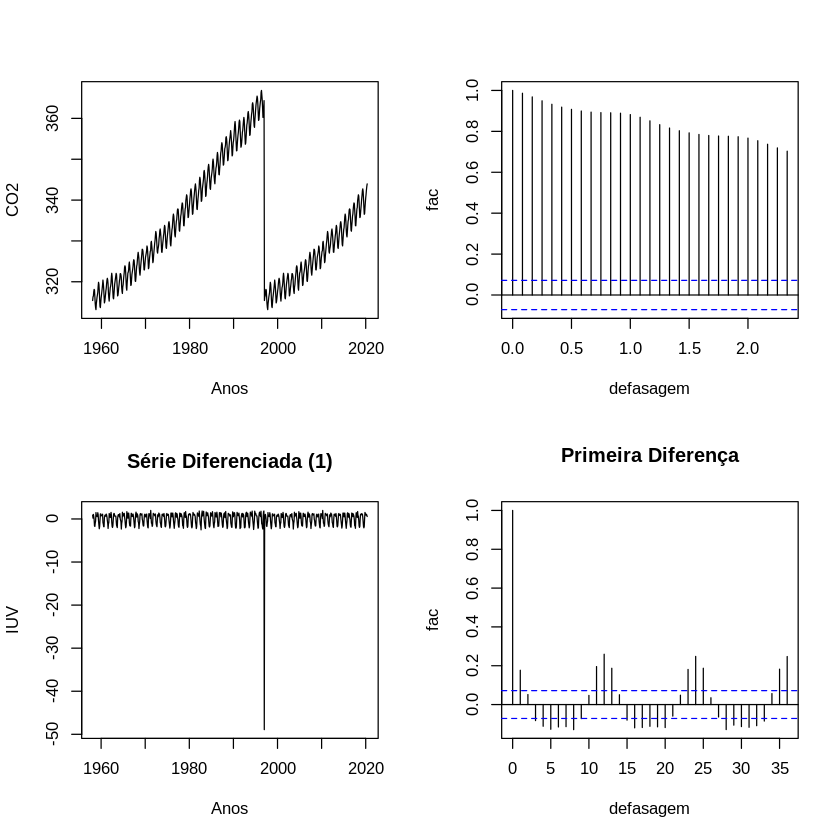

In [15]:
par(mfrow=c(2,2))
plot(Sco2,main='',xlab='Anos',ylab='CO2')
acf (Sco2,xlab='defasagem',ylab='fac',main='',na.action=na.pass)
plot(diff(Sco2),main='Série Diferenciada (1)',xlab='Anos',ylab=' IUV ')
min.m = acf(diff(Sco2),lag.max=36, plot=F, na.action=na.pass)
min.m$lag = min.m$lag*12
plot(min.m, main = 'Primeira Diferença', xlab='defasagem',ylab='fac')

### Diferenciação simples e sazonal

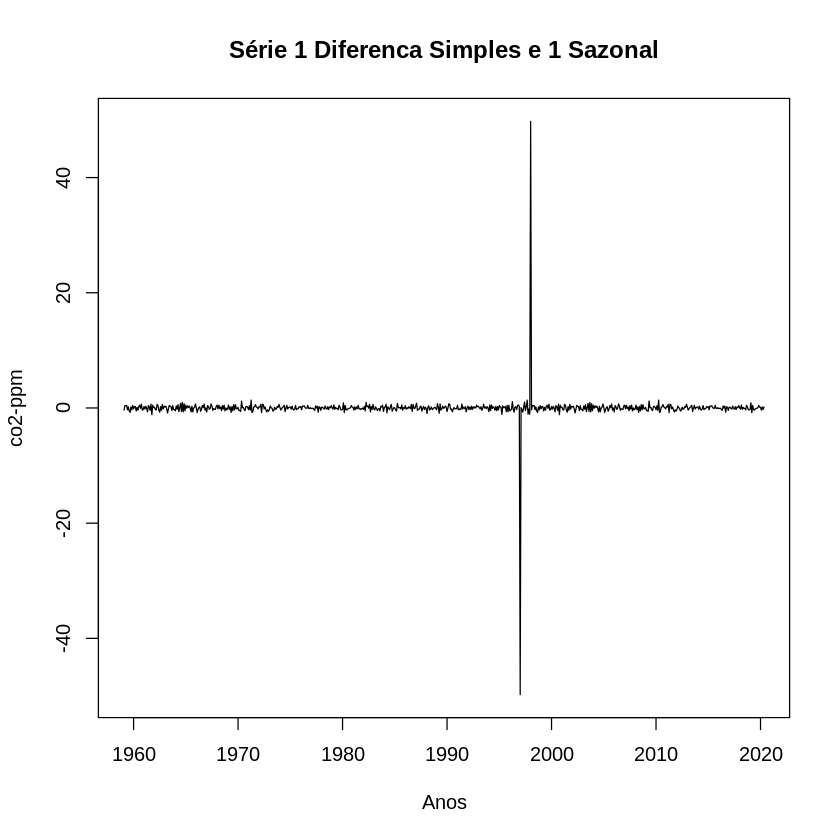

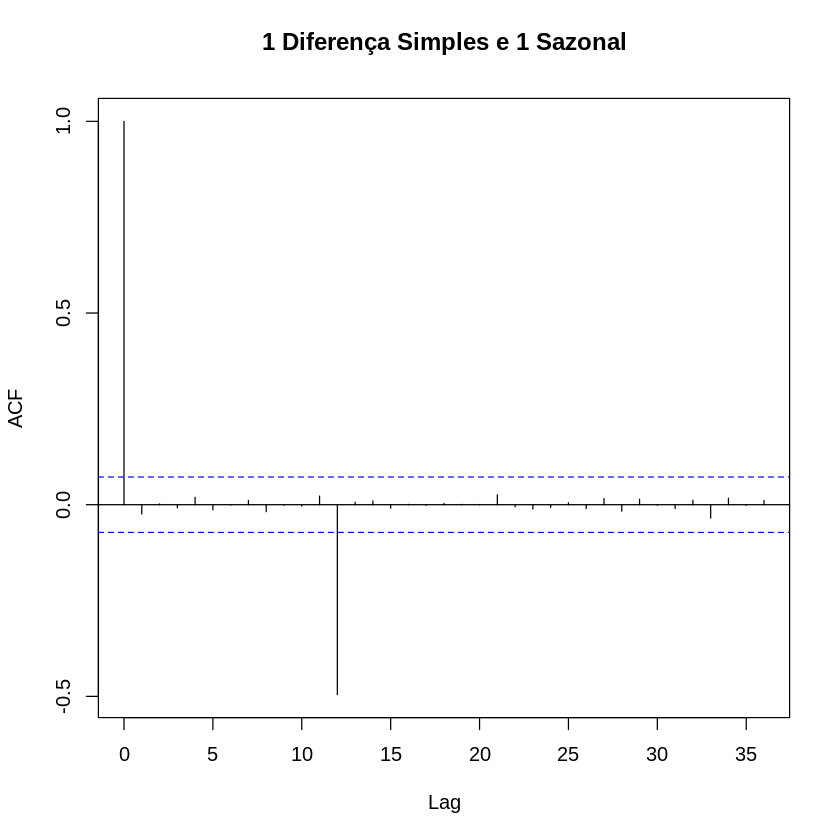

In [16]:
plot(diff(diff(Sco2),lag=12),main='Série 1 Diferenca Simples e 1 Sazonal',xlab='Anos',ylab=' co2-ppm ')
min.m = acf(diff(diff(Sco2),lag=12), lag.max=36, plot=F, na.action=na.pass)
min.m$lag = min.m$lag*12
plot(min.m, main='1 Diferença Simples e 1 Sazonal')

### Diferenciação Sazonal
- ACF: Relação de uma série consigo mesma em lags diferentes. Picos são lags.
- PACF: O mesmo, removendo os efeitos de lags anteriores.

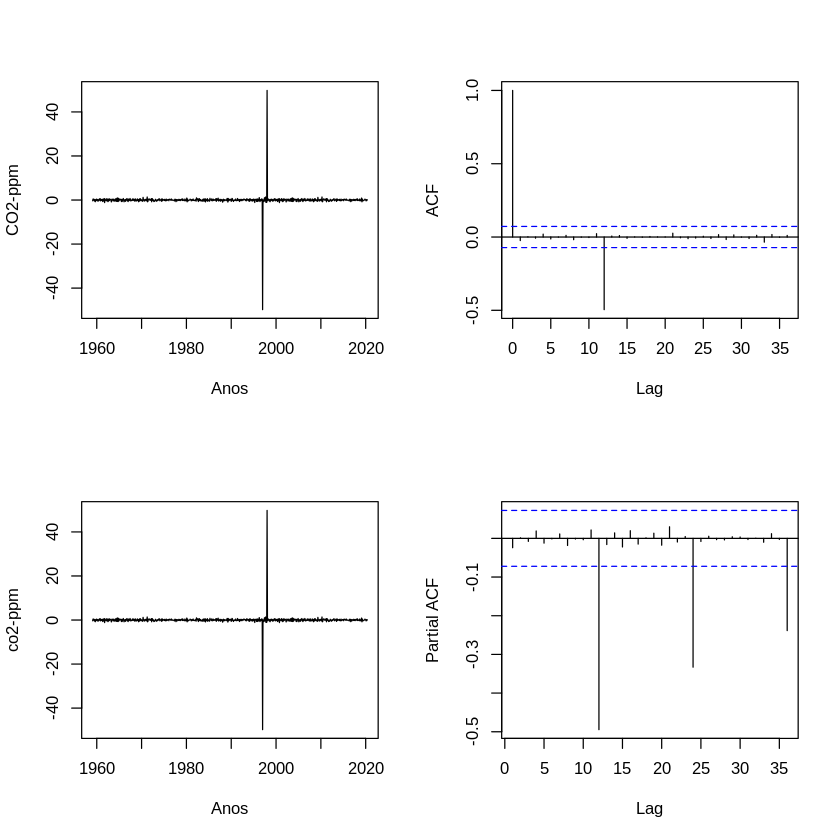

In [17]:
par(mfrow=c(2,2))
plot(diff(diff(Sco2),lag=12),main='',xlab='Anos',ylab=' CO2-ppm ')
min.m = acf(diff(diff(Sco2),lag=12), lag.max=36, plot=F, na.action=na.pass)
min.m$lag = min.m$lag*12
plot(min.m, main='')
plot(diff(diff(Sco2),lag=12),main='',xlab='Anos',ylab='co2-ppm')
pmin.m = pacf(diff(diff(Sco2),lag=12), lag.max=36, plot=F, na.action=na.pass)
pmin.m$lag = pmin.m$lag*12
plot(pmin.m, main='')

- p: termo da parte autoregressiva
   - Número de valores da FACP que estiverem acima do valor de confiança será considerado o valor máximo que **p** poderá atingir
- q: ordem da parte de média móvel
   - Número de valores da FAC que estiverem acima do seu intervalo de confiança.
Considerado o valor máximo que **q** poderá atingir
- d: número de diferenciações realizadas para estacionarizar os dados

# Modelo ARIMA

In [18]:
m1 = arima(Sco2,order=c(1,1,1),include.mean=F)
m1# determina para o modelo os coeficientes de p(AR) e q(Ma)


Call:
arima(x = Sco2, order = c(1, 1, 1), include.mean = F)

Coefficients:
         ar1      ma1
      0.2299  -0.0547
s.e.  0.1353   0.1362

sigma^2 estimated as 4.461:  log likelihood = -1620.62,  aic = 3247.24

# Modelo SARIMA

In [19]:
m2=arima(x = Sco2, order = c(1, 1, 1), seasonal = list(order = c(1, 1, 1)))
m2# determina para o modelo os coeficientes de p(AR) e q(Ma) da parte sazonal

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”



Call:
arima(x = Sco2, order = c(1, 1, 1), seasonal = list(order = c(1, 1, 1)))

Coefficients:
         ar1      ma1    sar1     sma1
      0.0654  -0.0866  0.0077  -1.0000
s.e.     NaN      NaN  0.0369   0.0172

sigma^2 estimated as 3.418:  log likelihood = -1521.32,  aic = 3052.64

# Diagnósticos

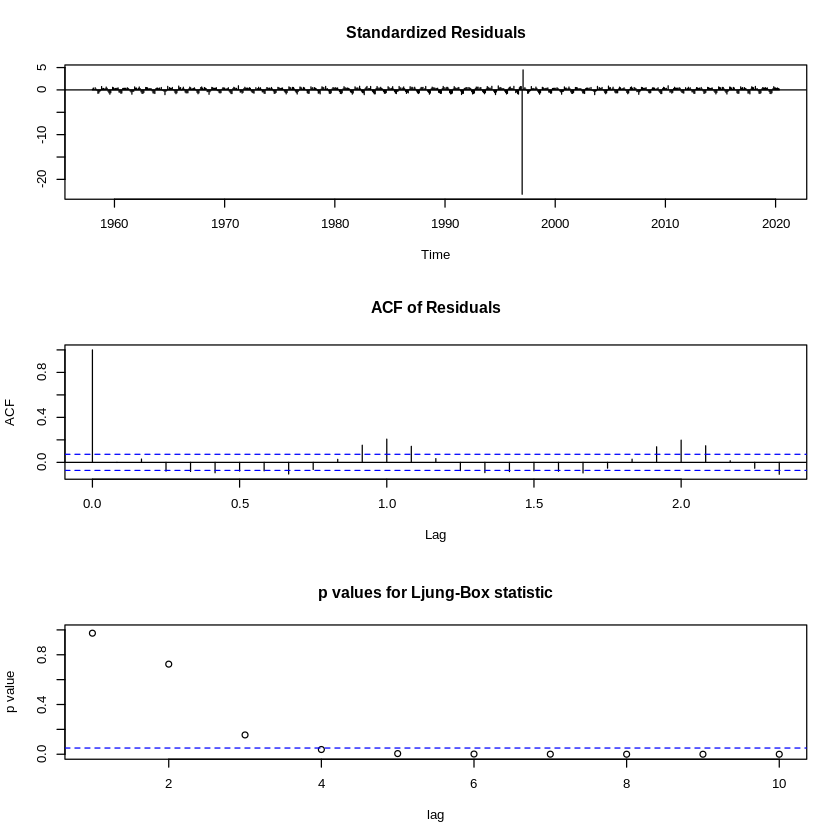

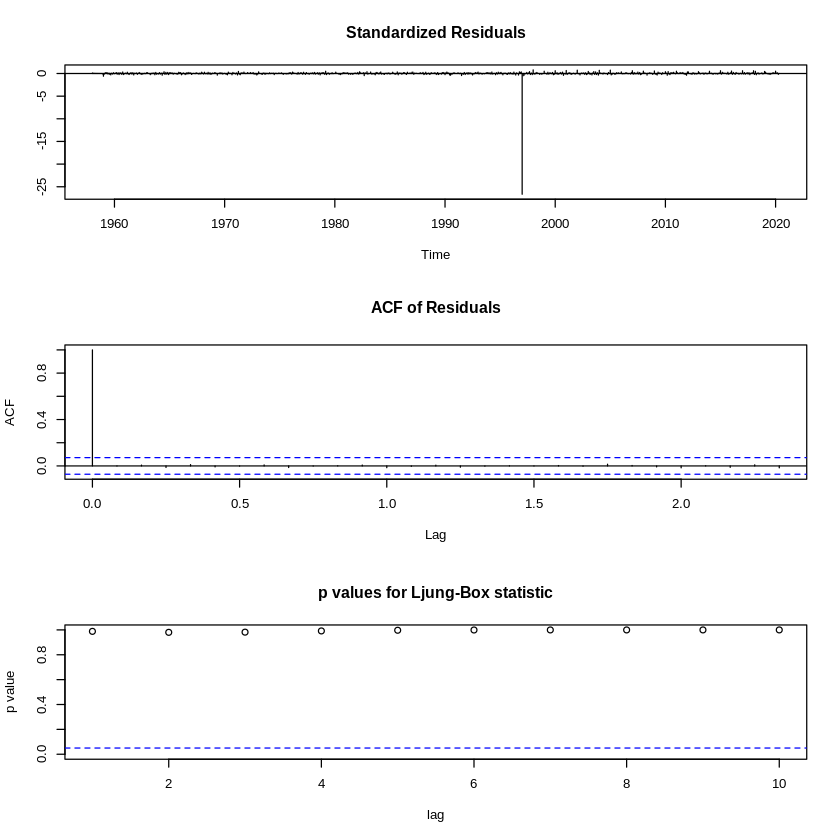

In [20]:
tsdiag(m1)# diagnostico ARIMA
tsdiag(m2)# diagnostico SARIMA

# Análise dos resíduos após induzir estacionaridade

### ARIMA


	Shapiro-Wilk normality test

data:  z
W = 0.3516, p-value < 2.2e-16



	Box-Pierce test

data:  m1$residuals
X-squared = 0.0010831, df = 1, p-value = 0.9737


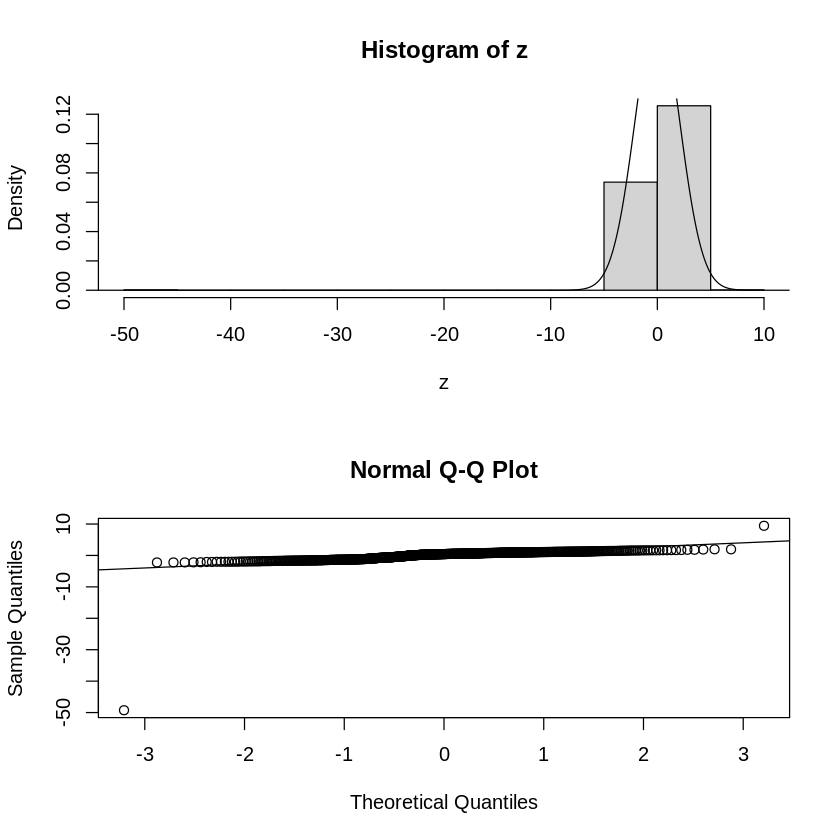

In [21]:
par(mfrow=c(2,1))
z=m1$residuals
hist(z,freq=F)
d = seq(range(z)[1]-3*sd(z),range(z)[2]+3*sd(z),0.001)
lines(d,dnorm(d,0,sd(z)))
qqnorm(z)
qqline(z)
#Teste de normalidade Shapiro-Wilk
shapiro.test(z)
#The BoxPierce (and LjungBox)
Box.test(m1$residuals,lag=1)# para ARIMA

### SARIMA

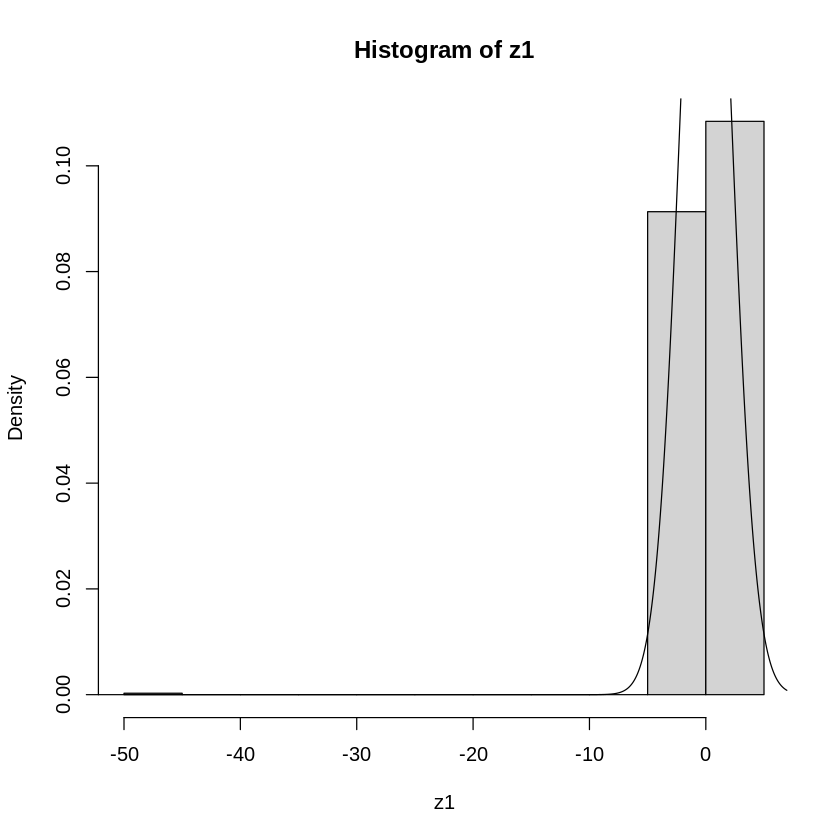


	Shapiro-Wilk normality test

data:  z1
W = 0.092237, p-value < 2.2e-16



	Box-Pierce test

data:  m2$residuals
X-squared = 0.00021111, df = 1, p-value = 0.9884


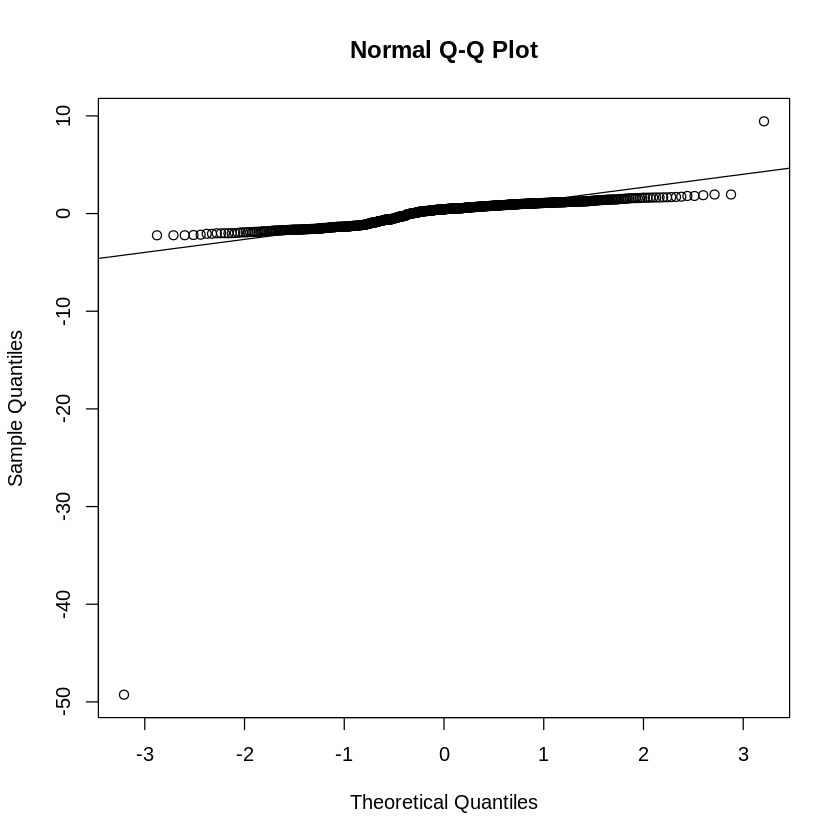

In [22]:
z1=m2$residuals
hist(z1,freq=F)
d1 = seq(range(z1)[1]-3*sd(z1),range(z1)[2]+3*sd(z1),0.001)
lines(d1,dnorm(d1,0,sd(z)))
qqnorm(z)
qqline(z)
#Teste de normalidade Shapiro-Wilk
shapiro.test(z1)
#Teste da idependencia dos residuos
#The BoxPierce (and LjungBox)
Box.test(m2$residuals,lag=1)# para SARIMA

# Previsões

### ARIMA

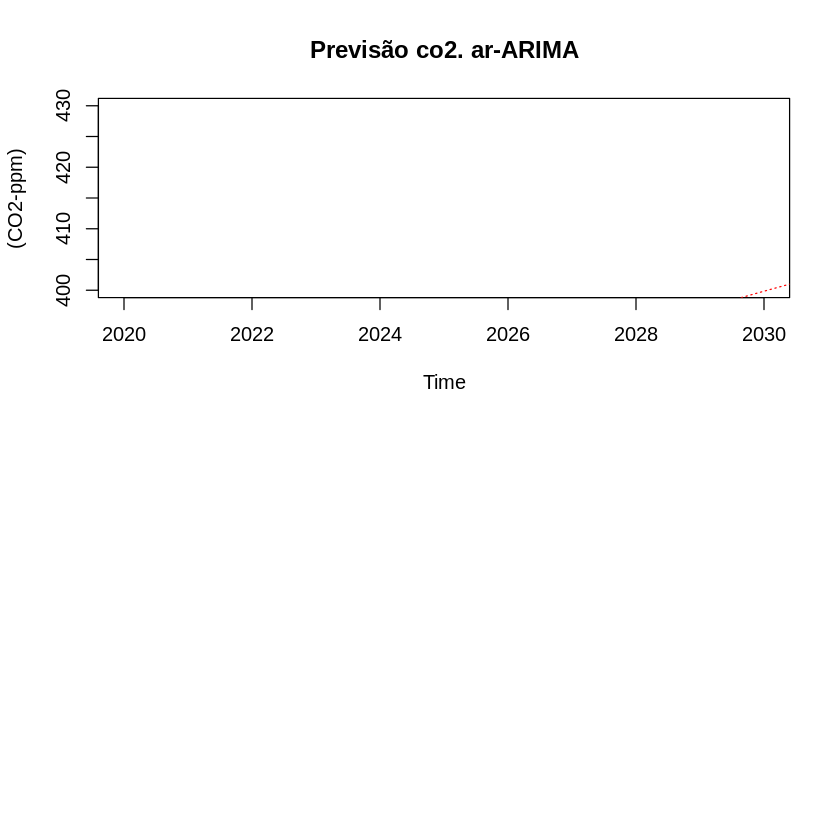

In [23]:
par(mfrow=c(2,1))
plot(Sco2,main="Previsão co2. ar-ARIMA", ylab="(CO2-ppm)", xlim=c(2020,2030),ylim=c(400,430))
pred1<-predict(m1,n.ahead=240)
lines(pred1$pred,col="red")
lines(pred1$pred+2*pred1$se,col="red",lty=3)
lines(pred1$pred-2*pred1$se,col="red",lty=3)

### SARIMA

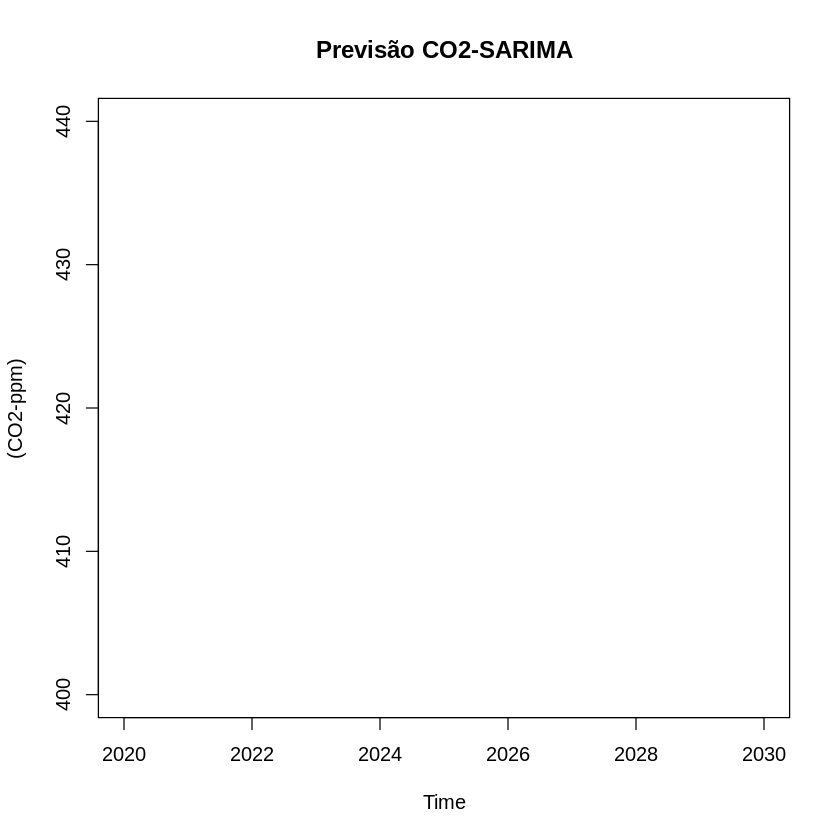

In [24]:
plot(Sco2,main="Previsão CO2-SARIMA",ylab="(CO2-ppm)", xlim=c(2020,2030),ylim=c(400,440))
pred1<-predict(m2,n.ahead=240)
lines(pred1$pred,col="blue")
lines(pred1$pred+2*pred1$se,col="blue",lty=3)
lines(pred1$pred-2*pred1$se,col="blue",lty=3)

Referências
> https://arxiv.org/pdf/2009.05894